In [1]:
import pandas as pd
from math import log
import numpy as np
import matplotlib.pyplot as plt

In [9]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'

covidCases = pd.read_csv(url).drop(columns=['fips']).set_index(['state','county','date']).sort_index()
covidCasesByCounty = covidCases
covidCasesByCounty.index = covidCases.index.map(lambda index: ((index[1]+", " + index[0],index[2])))
covidCasesByState = covidCases.groupby(['state','date']).sum()
covidCasesWholeCountry = covidCases.groupby(['date']).sum()
covidCases.head

ValueError: Length of names must match number of levels in MultiIndex.

In [3]:
def getDeathRate(deaths, cases): 
    if cases <= 0: return np.NaN 
    else: return deaths / cases

crudeDeathRate = covidCases.apply(lambda row: getDeathRate(row.deaths,row.cases), axis = 1)

changes = covidCases.diff(1)

pctChanges = covidCases.pct_change(1)

def getDoublingTimeFromPctChange(pctChange): 
    if pctChange <= 0: return np.NaN
    if pctChange == np.Inf: return np.NaN
    else:  return log(2) / log(1+pctChange)

doublingTimes = pctChanges.applymap(getDoublingTimeFromPctChange)

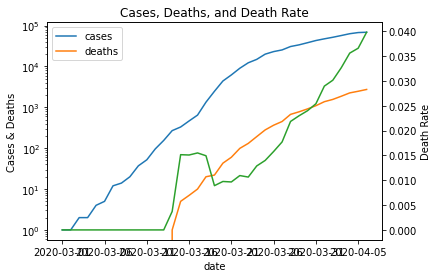

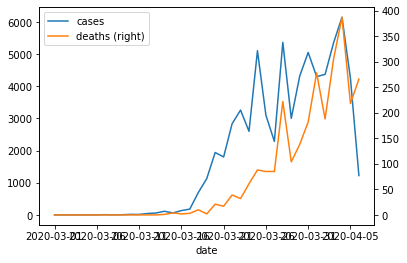

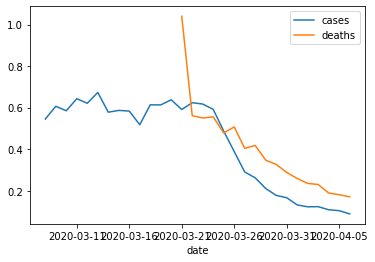

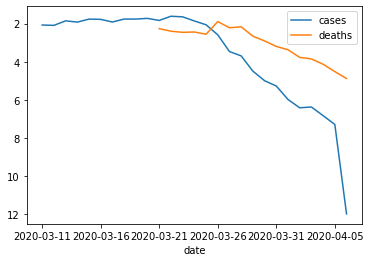

In [5]:
location = ('New York','New York City')
casePlot = covidCases.loc[location].plot(logy=True)
casePlot.set_title('Cases, Deaths, and Death Rate')
casePlot.set_ylabel('Cases & Deaths')
crudeDeathRate.loc[location].plot(secondary_y=True, label = 'death rate')
casePlot.right_ax.set_ylabel('Death Rate')
changePlot = changes.loc[location].plot(secondary_y=['deaths'])
changes
pctChanges.loc[location].rolling(7).mean().plot()
doublingTimes.loc[location].rolling(7).mean().plot().invert_yaxis()